In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
file_path = 'SandPConstantDollars.dat'
t = []
val = []
with open(file_path, 'r') as file:
    for line in file:
        line = line.split(" ")
        t.append(int(line[0]))
        val.append(float(line[1][:]))

Text(0, 0.5, 'values')

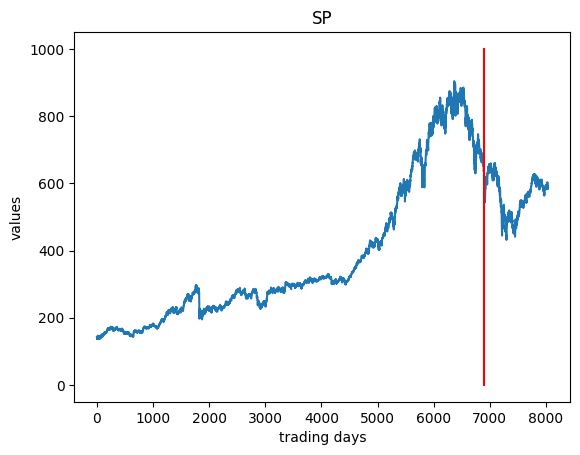

In [29]:
fig, ax = plt.subplots()
ax.plot(t, val)
ax.plot([6903, 6903], [0, 1000], 'r-', label="year 2000")
ax.set_title("SP")
ax.set_xlabel("trading days")
ax.set_ylabel("values")

In [42]:
lag_time = ["day", "week", "year"]
lag = [1, 5, 252]

def lag_var(value, lag):
    length = len(value) - lag
    p = []
    for i in range(length):
        p.append(100 * (value[i + lag] - value[i]) / (value[i]))
    return p

In [51]:
changes = []
for i in range(len(lag_time)):
    changes.append(lag_var(val, lag[i]))

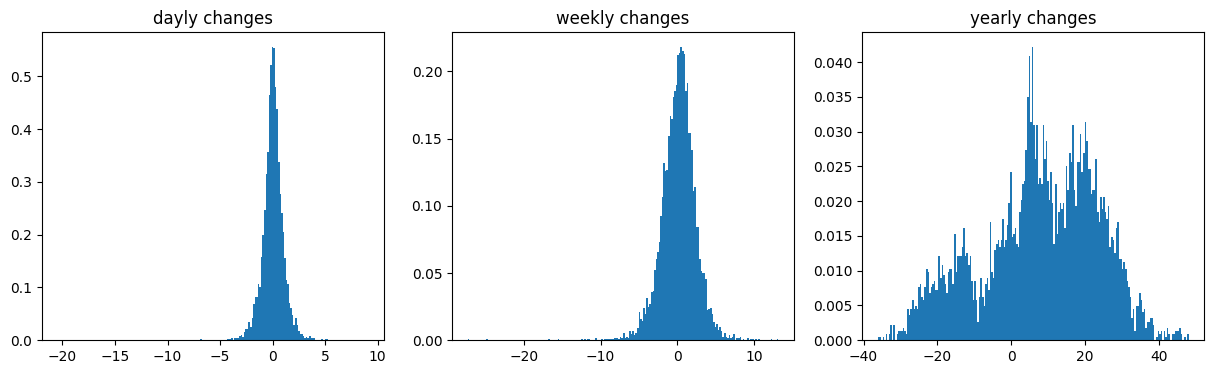

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(len(lag_time)):
    ax[i].hist(changes[i], bins=200, density=True)
    ax[i].set_title(f"{lag_time[i]} changes")

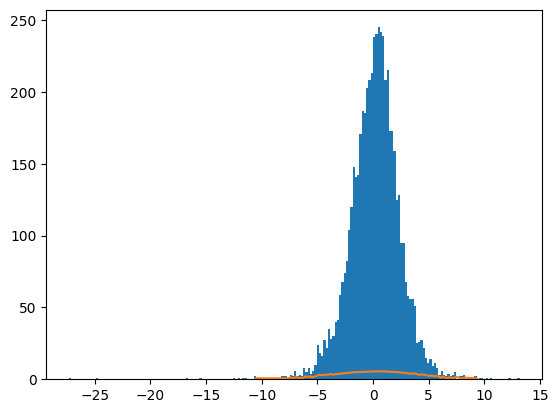

In [77]:
hist, bins, _ = plt.hist(changes[1], bins=200)
x = bins[1:][hist > 1]
y = hist[hist > 1]
plt.plot(x, np.log(y))

In [87]:
def FindVolatility(changes):
    volatility = []
    for i in range(len(changes)):
        sum = 0
        avg = np.array(changes[i]).mean()
        for j in range(len(changes[i])):
            sum += (changes[i][j] - avg) ** (2)
        volatility.append(np.sqrt(sum.mean()))
    return volatility


In [88]:
changes = []
for i in range(1, 101):
    changes.append(lag_var(val, i))

In [89]:
vol = FindVolatility(changes)

Text(0.5, 0, 'lag time / trading days')

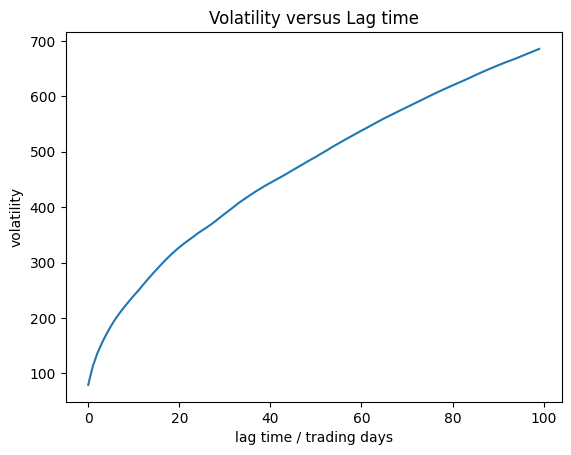

In [92]:
plt.plot(vol)
plt.title("Volatility versus Lag time")
plt.ylabel("volatility")
plt.xlabel("lag time / trading days")

Text(0.5, 0, 'lag time / trading days')

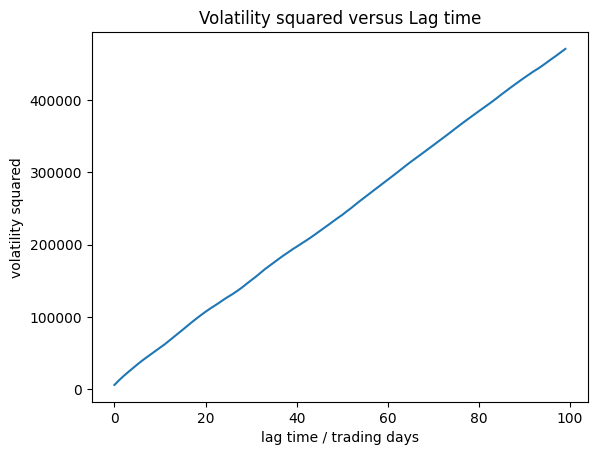

In [94]:
plt.plot(np.array(vol)**2)
plt.title("Volatility squared versus Lag time")
plt.ylabel("volatility squared")
plt.xlabel("lag time / trading days")